Bagging is an ensemble method involving training the same algorithm many times using different subsets sampled from the training data. In this chapter, you'll understand how bagging can be used to create a tree ensemble. You'll also learn how the random forests algorithm can lead to further ensemble diversity through randomization at the level of each split in the trees forming the ensemble.

# 1-Bagging


video

# 2- Define the bagging classifier


<p>In the following exercises you&apos;ll work with the <a href="https://www.kaggle.com/uciml/indian-liver-patient-records">Indian Liver Patient</a> dataset from the UCI machine learning repository. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You&apos;ll do so using a Bagging Classifier.</p>

<ul>
<li><p>Import <code>DecisionTreeClassifier</code> from <code>sklearn.tree</code> and <code>BaggingClassifier</code> from <code>sklearn.ensemble</code>.</p></li>
<li><p>Instantiate a <code>DecisionTreeClassifier</code> called <code>dt</code>.</p></li>
<li><p>Instantiate a <code>BaggingClassifier</code> called <code>bc</code> consisting of 50 trees.</p></li>
</ul>

In [1]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier


# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

# 3- Evaluate Bagging performance


<p>Now that you instantiated the bagging classifier, it&apos;s time to train it and evaluate its test set accuracy. </p>
<p>The Indian Liver Patient dataset is processed for you and split into 80% train and 20% test. The feature matrices <code>X_train</code> and <code>X_test</code>, as well as the arrays of labels <code>y_train</code> and <code>y_test</code> are available in your workspace. In addition, we have also loaded the bagging classifier <code>bc</code> that you instantiated in the previous exercise and the function <code>accuracy_score()</code> from <code>sklearn.metrics</code>.</p>

In [12]:
#preprocessing, by me, To make dataset as like in the server of DataCamp
import pandas as pd

liver=pd.read_csv('datasets/indian_liver_patient/indian_liver_patient.csv')


print(liver.info())

print(liver.isnull().sum())

liver=liver.dropna()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin              

In [16]:
#More preprocessing 
#Creating dummy variables, for Gender colum

# Create dummy variables: 
liver = pd.get_dummies(liver)

# Print the columns of liver
print(liver.columns)

# Create dummy variables with drop_first=True: liver
liver_preprocessed = pd.get_dummies(liver, drop_first=True)

# Print the new columns of df_region
print(liver_preprocessed.columns)

liver_preprocessed=liver_preprocessed.drop('Gender_Female', axis=1)
liver_preprocessed.head()

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset',
       'Gender_Female', 'Gender_Male'],
      dtype='object')
Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset',
       'Gender_Female', 'Gender_Male'],
      dtype='object')


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


In [17]:
#note Dataset column is Liver_disease column
X=liver_preprocessed.drop('Dataset', axis=1)
y=liver_preprocessed['Dataset']

In [18]:
from sklearn.metrics import accuracy_score
import pandas as pd

#Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

SEED=1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=SEED)

---------

<ul>
<li><p>Fit <code>bc</code> to the training set.</p></li>
<li><p>Predict the test set labels and assign the result to <code>y_pred</code>.</p></li>
<li><p>Determine <code>bc</code>&apos;s test set accuracy.</p></li>
</ul>

In [19]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_pred, y_test)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.70


# 4- Out of Bag Evaluation


video

# 5- Prepare the ground


<p>In the following exercises, you&apos;ll compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset. </p>
<p>In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter <code>oob_score</code> to <code>True</code> during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the <code>.oob_score_</code> attribute from the corresponding instance.</p>
<p>In your environment, we have made available the class <code>DecisionTreeClassifier</code> from <code>sklearn.tree</code>.</p>

<ul>
<li><p>Import <code>BaggingClassifier</code> from <code>sklearn.ensemble</code>.</p></li>
<li><p>Instantiate a <code>DecisionTreeClassifier</code> with <code>min_samples_leaf</code> set to 8.</p></li>
<li><p>Instantiate a <code>BaggingClassifier</code> consisting of 50 trees and set <code>oob_score</code> to <code>True</code>.</p></li>
</ul>

In [20]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

# 6- OOB Score vs Test Set Score


<p>Now that you instantiated <code>bc</code>, you will fit it to the training set and evaluate its test set and OOB accuracies. </p>
<p>The dataset is processed for you and split into 80% train and 20% test. The feature matrices <code>X_train</code> and <code>X_test</code>, as well as the arrays of labels <code>y_train</code> and <code>y_test</code> are available in your workspace. In addition, we have also loaded the classifier <code>bc</code> instantiated in the previous exercise and the function <code>accuracy_score()</code> from <code>sklearn.metrics</code>.</p>

<ul>
<li><p>Fit <code>bc</code> to the training set and predict the test set labels and assign the results to <code>y_pred</code>.</p></li>
<li><p>Evaluate the test set accuracy <code>acc_test</code> by calling <code>accuracy_score</code>.</p></li>
<li><p>Evaluate <code>bc</code>&apos;s OOB accuracy <code>acc_oob</code> by extracting the attribute <code>oob_score_</code> from <code>bc</code>.</p></li>
</ul>

In [21]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_pred, y_test)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.724, OOB accuracy: 0.687


# 7- Random Forests (RF)


video

# 8- Train an RF regressor


<p>In the following exercises you&apos;ll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the <a href="https://www.kaggle.com/c/bike-sharing-demand">Bike Sharing Demand</a> dataset available through Kaggle. For this purpose, you will be using the random forests algorithm. As a first step, you&apos;ll define a random forests regressor and fit it to the training set.</p>
<p>The dataset is processed for you and split into 80% train and 20% test. The features matrix <code>X_train</code> and the array <code>y_train</code> are available in your workspace.</p>

In [25]:
#importing data and preprocessing 

bikes=pd.read_csv('datasets/bikes.csv')
print(bikes.info())

X=bikes.drop('cnt', axis=1)
y=bikes['cnt']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 13 columns):
hr                        1488 non-null int64
holiday                   1488 non-null int64
workingday                1488 non-null int64
temp                      1488 non-null float64
hum                       1488 non-null float64
windspeed                 1488 non-null float64
cnt                       1488 non-null int64
instant                   1488 non-null int64
mnth                      1488 non-null int64
yr                        1488 non-null int64
Clear to partly cloudy    1488 non-null int64
Light Precipitation       1488 non-null int64
Misty                     1488 non-null int64
dtypes: float64(3), int64(10)
memory usage: 151.2 KB
None


----------------------

<ul>
<li><p>Import <code>RandomForestRegressor</code> from <code>sklearn.ensemble</code>.</p></li>
<li><p>Instantiate a <code>RandomForestRegressor</code> called <code>rf</code> consisting of 25 trees.  </p></li>
<li><p>Fit <code>rf</code> to the training set.</p></li>
</ul>

In [26]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=25,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

# 9- Evaluate the RF regressor


<p>You&apos;ll now evaluate the test set RMSE of the random forests regressor <code>rf</code> that you trained in the previous exercise. </p>
<p>The dataset is processed for you and split into 80% train and 20% test. The features matrix <code>X_test</code>, as well as the array <code>y_test</code> are available in your workspace. In addition, we have also loaded the model <code>rf</code> that you trained in the previous exercise.</p>

<ul>
<li>Import <code>mean_squared_error</code> from <code>sklearn.metrics</code> as <code>MSE</code>. </li>
<li>Predict the test set labels and assign the result to <code>y_pred</code>.  </li>
<li>Compute the test set RMSE and assign it to <code>rmse_test</code>.</li>
</ul>

In [27]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 50.38


# 10- Visualizing features importances


<p>In this exercise, you&apos;ll determine which features were the most predictive according to the random forests regressor <code>rf</code> that you trained in a previous exercise. </p>
<p>For this purpose, you&apos;ll draw a horizontal barplot of the feature importance as assessed by <code>rf</code>. Fortunately, this can be done easily thanks to plotting capabilities of <code>pandas</code>.</p>
<p>We have created a <code>pandas.Series</code> object called <code>importances</code> containing the feature names as <code>index</code> and their importances as values. In addition, <code>matplotlib.pyplot</code> is available as <code>plt</code> and <code>pandas</code> as <code>pd</code>.</p>

<ul>
<li><p>Call the <code>.sort_values()</code> method on <code>importances</code> and assign the result to <code>importances_sorted</code>.</p></li>
<li><p>Call the <code>.plot()</code> method on <code>importances_sorted</code> and set the arguments:</p>
<ul>
<li><code>kind</code> to <code>&apos;barh&apos;</code> </li>
<li><code>color</code> to <code>&apos;lightgreen&apos;</code></li></ul></li>
</ul>

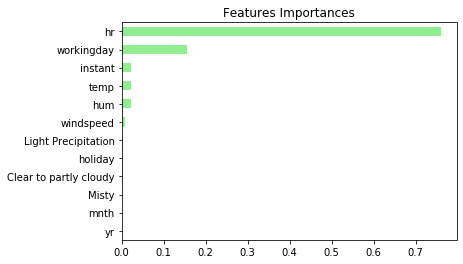

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()